In [35]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
# Load and preprocess data
df = pd.read_csv("titanic.csv")
df["Age"] = df.groupby("Pclass")["Age"].transform(lambda group: group.fillna(group.mean()))
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["IsAlone"] = (df["FamilySize"] == 1).astype(int)
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].fillna("S").map({"S": 0, "C": 1, "Q": 2})

In [37]:
# Select features and target
cdf = df[["Age", "Fare", "Pclass", "Sex", "FamilySize", "IsAlone", "Embarked"]]
target = df["Survived"]

In [38]:
# Split data and train model
X_train, X_test, y_train, y_test = train_test_split(cdf, target, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}, R^2 Score: {r2:.4f}")

Mean Squared Error: 0.1327, R^2 Score: 0.4530


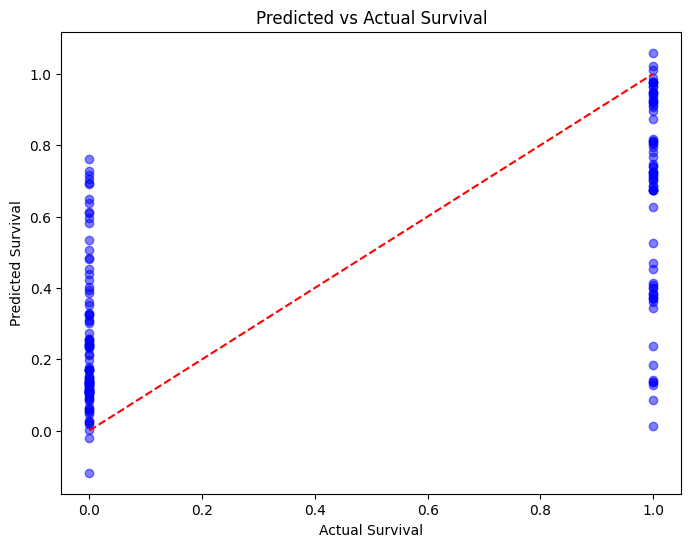

In [39]:
# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.title("Predicted vs Actual Survival")
plt.xlabel("Actual Survival")
plt.ylabel("Predicted Survival")
plt.show()

In [40]:
def custom_standardize(data):
    return (data - data.min()) / (data.max() - data.min())
   

# نرمال‌سازی دستی
features_manual = custom_standardize(cdf)

# آموزش مدل با داده‌های نرمال‌شده
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(features_manual, target, test_size=0.2, random_state=42)
model_manual = LinearRegression()
model_manual.fit(X_train_m, y_train_m)
y_pred_m = model_manual.predict(X_test_m)
mse_manual = mean_squared_error(y_test_m, y_pred_m)
print(f"Manual Standardization MSE: {mse_manual:.4f}")

Manual Standardization MSE: 0.1327


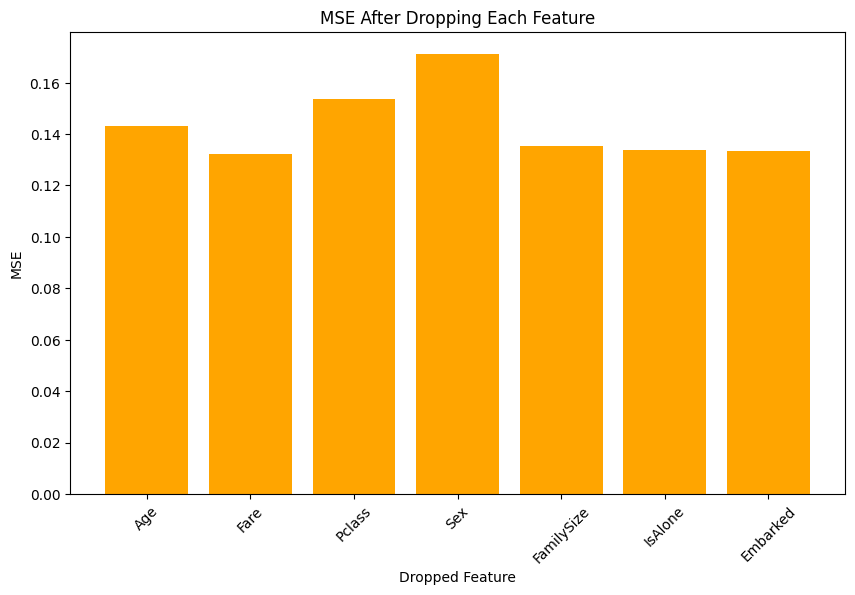

In [41]:
# dropping each feature to see the diffrence
mse_scores = {}
for feature in cdf.columns:
    
    reduced_features = cdf.drop(columns=[feature])
    
    X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(reduced_features, target, test_size=0.2, random_state=42)
    model_r = LinearRegression()
    model_r.fit(X_train_r, y_train_r)
    y_pred_r = model_r.predict(X_test_r)
    mse_r = mean_squared_error(y_test_r, y_pred_r)
    mse_scores[feature] = mse_r


plt.figure(figsize=(10, 6))
plt.bar(mse_scores.keys(), mse_scores.values(), color="orange")
plt.title("MSE After Dropping Each Feature")
plt.xlabel("Dropped Feature")
plt.ylabel("MSE")
plt.xticks(rotation=45)
plt.show()

Threshold 0.4: Accuracy = 0.7877
Threshold 0.5: Accuracy = 0.7989
Threshold 0.6: Accuracy = 0.8156
Threshold 0.3: Accuracy = 0.7821
Threshold 0.4: Accuracy = 0.7877
Threshold 0.5: Accuracy = 0.7989
Threshold 0.6: Accuracy = 0.8156
Threshold 0.7: Accuracy = 0.7989


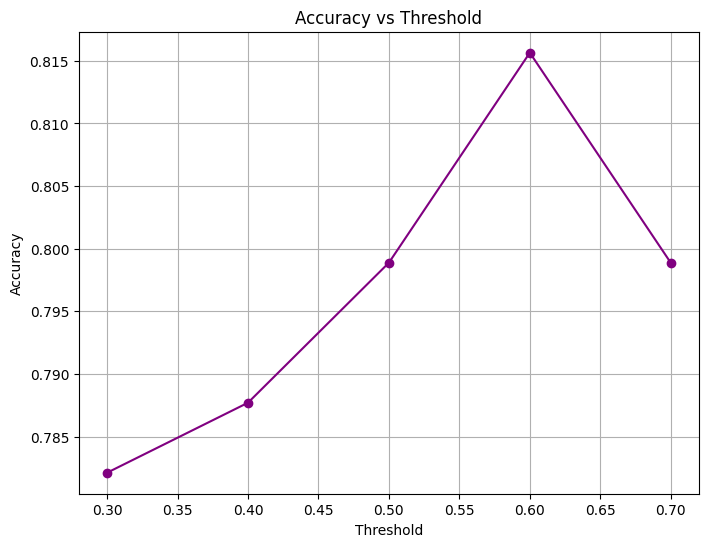

In [43]:
def binarize_predictions(predictions, threshold):
    binary_predictions = (predictions >= threshold).astype(int)
    return binary_predictions

thresholds = [0.4, 0.5, 0.6]
for threshold in thresholds:
    y_pred_binary = binarize_predictions(y_pred, threshold)
    accuracy = accuracy_score(y_test, y_pred_binary)
    print(f"Threshold {threshold}: Accuracy = {accuracy:.4f}")


accuracies = []
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
for threshold in thresholds:
    y_pred_binary = binarize_predictions(y_pred, threshold)
    accuracy = accuracy_score(y_test, y_pred_binary)
    accuracies.append(accuracy)
    print(f"Threshold {threshold}: Accuracy = {accuracy:.4f}")

# رسم نمودار
plt.figure(figsize=(8, 6))
plt.plot(thresholds, accuracies, marker="o", color="purple")
plt.title("Accuracy vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()